In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
print(df.isnull().mean()*100)
print(df.isnull().sum())

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64
Age         177
Fare         45
Family        0
Survived      0
dtype: int64


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

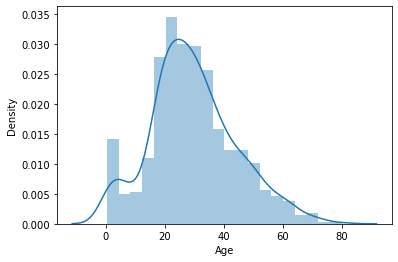

In [5]:

sns.distplot(df['Age'])

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_new', ylabel='Density'>

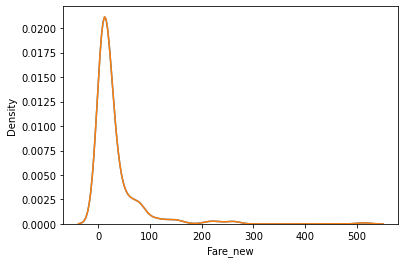

In [43]:
sns.distplot(df['Fare'],hist=False)
sns.distplot(df['Fare_new'],hist=False)

In [40]:
# replacing the null va;ues of Fare with the median as distribution is not a normal distribution
df['Fare_new']=df['Fare'].fillna(df['Fare'].median())

In [34]:
df.isnull().sum()

Age         177
Fare          0
Family        0
Survived      0
Fare_new    891
dtype: int64

In [35]:
df['Age_new']=df['Age'].fillna(df['Age'].mean())

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

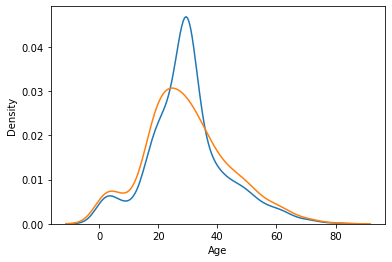

In [38]:
sns.distplot(df['Age_new'],hist=False)
sns.distplot(df['Age'],hist=False)

As distribution is changed after imputing mean values for Age , Red Flag

In [41]:
df

,Age,Fare,Family,Survived,Fare_new,Age_new
0,22.0,7.2500,1,0,7.2500,22.000000
1,38.0,71.2833,1,1,71.2833,38.000000
2,26.0,7.9250,0,1,7.9250,26.000000
3,35.0,53.1000,1,1,53.1000,35.000000
4,35.0,8.0500,0,0,8.0500,35.000000
...,...,...,...,...,...,...
886,27.0,13.0000,0,0,13.0000,27.000000
887,19.0,30.0000,0,1,30.0000,19.000000
888,NaN,23.4500,3,0,23.4500,29.699118
889,26.0,14.4542,0,1,14.4542,26.000000


In [44]:
X=df.drop(['Survived','Fare_new','Age_new','Family'],axis=1)
y=df['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
trf=ColumnTransformer([
    ('trf1',SimpleImputer(strategy='mean'),['Age']),
    ('trf2',SimpleImputer(strategy='median'),['Fare'])
    
],remainder='passthrough')

In [48]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(), ['Age']),
                                ('trf2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [51]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [55]:
check=pd.DataFrame(X_train,columns=['Age','Fare'])

In [56]:
check.head()

,Age,Fare
0,54.000000,51.8625
1,29.525983,15.5000
2,25.000000,41.5792
3,26.000000,14.4542
4,22.000000,10.5167


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

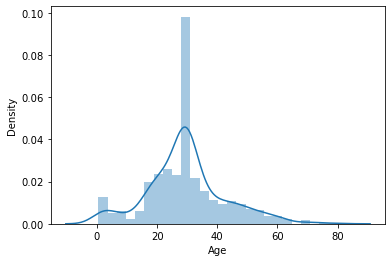

In [57]:
sns.distplot(check['Age'])

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

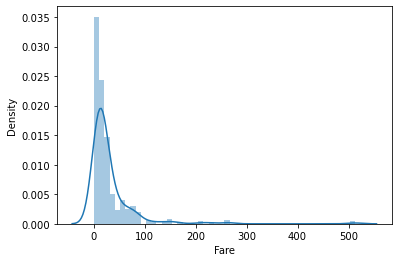

In [58]:
sns.distplot(check['Fare'])